Section 0: Import all necessary modules

In [137]:
# Import modules

import json
import numpy as np
import pandas as pd
import collections
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

Section 1: Write all functions needed to execute the algorithms

In [138]:
# Input: filename to a json file containing the desired dictionary
# Output: Return the dictionary obtained from the file
# Read in all json files created from the datacollection.py script
# json files contain dictionary of {review1: rating1, review2: rating2, ... , reviewn: ratingn}
def getjsons(filename):
    with open(filename, 'r') as fp:
        return json.load(fp)

In [139]:
# Input: a movie DataFrame
# Output: Return an array containing the sentiments from the ratings
# Sentiment is obtained by looping through all of the ratings
# 3.0 stars or above is given "Positive" and 2.5 stars or below is given "Negative"
def getsentiment(df):
    sentiments = []
    for val in df['Rating']:
        if float(val) >= 3.0:
            sentiments.append("Positive")
        else:
            sentiments.append("Negative")
    return np.array(sentiments)

In [140]:
# Input: dictionary containing reviews mapped to ratings
# Output: Return a Pandas DataFrame containing reviews in column 1, ratings in column 2, sentiment in column 3
# Sentiment is obtained by the getsentiment function
def createdf(dictionary):
    df = pd.DataFrame(dictionary.items(), columns = ['Review', 'Rating'], dtype=None)
    df['Sentiment'] = getsentiment(df)
    return df

In [141]:
# Input: a movie DataFrame and the name of the movie
# Output: Obtain and print out the 20 most common words from each given movie
def mostcommon(df, name):
    # Initialize empty counts array (will contain dictionary of counts to their words)
    counts = []
    # Initialize a CountVectorizer
    vector = CountVectorizer()
    # Create a DataFrame containing words and their counts
    words = df['Review']
    dtm = vector.fit(words.values.astype('U'))
    names = dtm.get_feature_names()
    dtm = vector.fit_transform(words.values.astype('U'))
    dtm_dense = dtm.todense()
    df = pd.DataFrame(dtm_dense, columns=names)
    for col in df:
        counts.append((df[col].sum(), col))
    print "\nTop 20 words to describe", name
    # Sort the dictionary by count and print out word correlated to count in top 20 counts
    for i in sorted(counts)[-20:]:
        print i[1], ":", i[0]

In [142]:
# Input: training and testing data
# Output: returns the accuracy score obtained from naive bayes algorithm
def naive_bayes(train, test):
    # Map positive as 1, negative as 0 for training and testing data
    train['Label_num'] = train.Sentiment.map({'Positive':1, 'Negative':0})
    test['Label_num'] = test.Sentiment.map({'Positive':1, 'Negative':0})

    # X (train and test) will be the review, y will be positive or negative
    X_train = train.Review
    y_train = train.Label_num
    X_test = test.Review
    y_test = test.Label_num
    
    # Initialize a CountVectorizer
    vector = CountVectorizer()
    # Create document-term matrices (note: astype('U') deals with strange unicode characters)
    X_train_dtm = vector.fit_transform(X_train.values.astype('U'))
    X_test_dtm = vector.transform(X_test.values.astype('U'))

    # Initialize a MultinomialNB object
    nb = MultinomialNB()
    # Fit the data
    nb.fit(X_train_dtm, y_train)
    # Predict values with X testing data
    y_pred_class = nb.predict(X_test_dtm)

    # Grab accuracy score and return
    score = metrics.accuracy_score(y_test, y_pred_class)
    return score

In [143]:
# Input: training and testing data
# Output: returns the accuracy score obtained from logistic regression algorithm
def log_reg(train, test):
    # Map positive to 1, negative to 0 for training and testing data
    train['Label_num'] = train.Sentiment.map({'Positive':1, 'Negative':0})
    test['Label_num'] = test.Sentiment.map({'Positive':1, 'Negative':0})

    # X (train and test) is the review, y is the positive or negative sentiment
    X_train = train.Review
    y_train = train.Label_num
    X_test = test.Review
    y_test = test.Label_num
    
    # Initailize CountVectorizer object and create document-term matrices (note: astype('U') handles strange unicode characters)
    vector = CountVectorizer()
    X_train_dtm = vector.fit_transform(X_train.values.astype('U'))
    X_test_dtm = vector.transform(X_test.values.astype('U'))
    
    # Initialize LogisticRegression object and fit the data
    logistic = LogisticRegression()
    logistic.fit(X_train_dtm, y_train)
    
    # Obtain predicted result and return the accuracy score
    y_predicted_class = logistic.predict(X_test_dtm)
    return metrics.accuracy_score(y_test, y_predicted_class)

Section 2: Grab all data from files, preprocess the data into training and testing DataFrames

In [144]:
# Use getjsons function to obtain dictionaries for all movies where {review1: rating1, ... , reviewn: ratingn}
starwars = getjsons("starwars.json")
abouttime = getjsons("abouttime.json")
taken = getjsons("taken.json")
toystory = getjsons("toystory.json")
cloudatlas = getjsons("cloudatlas.json")
stepbrothers = getjsons("stepbrothers.json")
saw = getjsons("saw.json")
saw2 = getjsons("saw2.json")
titanic = getjsons("titanic.json")
piratesofthecaribbean = getjsons("piratesofthecaribbean.json")

In [145]:
# Call createdf function on all dictionaries
# DataFrames will have columns of Reviews, Ratings, and Sentiment
starwars = createdf(starwars)
abouttime = createdf(abouttime)
taken = createdf(taken)
toystory = createdf(toystory)
cloudatlas = createdf(cloudatlas)
stepbrothers = createdf(stepbrothers)
saw = createdf(saw)
saw2 = createdf(saw2)
titanic = createdf(titanic)
piratesofthecaribbean = createdf(piratesofthecaribbean)

In [146]:
# Obtain the 20 most common words for all movies and print results by calling mostcommon function
mostcommon(starwars, "Star Wars")
mostcommon(abouttime, "About Time")
mostcommon(taken, "Taken")
mostcommon(toystory, "Toy Story")
mostcommon(cloudatlas, "Cloud Atlas")
mostcommon(stepbrothers, "Stepbrothers")
mostcommon(saw, "Saw")
mostcommon(saw2, "Saw 2")
mostcommon(titanic, "Titanic")
mostcommon(piratesofthecaribbean, "Pirates of the Caribbean")


Top 20 words to describe Star Wars
jedi : 161
plot : 175
rey : 180
this : 184
new : 188
trilogy : 193
awakens : 224
story : 224
hope : 241
original : 256
great : 261
good : 290
it : 295
force : 326
characters : 357
film : 430
the : 662
wars : 689
movie : 741
star : 800

Top 20 words to describe About Time
gleeson : 96
rachel : 106
curtis : 110
places : 111
mcadams : 119
tim : 120
this : 133
about : 137
romantic : 141
great : 176
good : 181
story : 201
it : 215
life : 250
travel : 265
the : 278
love : 342
film : 403
movie : 569
time : 737

Top 20 words to describe Taken
movies : 75
time : 86
plot : 93
watch : 95
bad : 97
thriller : 102
fun : 104
this : 105
story : 106
daughter : 139
it : 168
great : 187
taken : 212
the : 215
good : 235
film : 360
liam : 405
neeson : 470
movie : 494
action : 588

Top 20 words to describe Toy Story
good : 115
movies : 126
films : 147
this : 149
classic : 161
buzz : 167
it : 182
toys : 191
woody : 191
time : 196
characters : 203
great : 240
animated : 243

In [147]:
# Create all training and testing data by creating lists (various combinations of the 10 movies)
# Basically, train1-5 and test1-5 will loop through 2 movies at a time to accomplish 5-fold Cross Validation
# train1-10_10 and test1-10_10 will loop through each movie at a time to accomplish 10-fold Cross Validation

# All dataframes in this list
dataframes = [starwars, abouttime, taken, toystory, cloudatlas, stepbrothers, saw, saw2, titanic, piratesofthecaribbean]

# Go through and exclude two movie at a time; t1 can be obtained through dataframes[0:8], t5 through dataframes[2:10]
t2 = [starwars, abouttime, taken, toystory, cloudatlas, stepbrothers, titanic, piratesofthecaribbean]
t3 = [starwars, abouttime, taken, toystory, saw, saw2, titanic, piratesofthecaribbean]
t4 = [starwars, abouttime, cloudatlas, stepbrothers, saw, saw2, titanic, piratesofthecaribbean]

# Go through and exclude one movie at a time; t1_10 can be obtained through dataframes[0:9], t10_10 through dataframes[1:10]
t2_10 = [starwars, abouttime, taken, toystory, cloudatlas, stepbrothers, saw, saw2, piratesofthecaribbean]
t3_10 = [starwars, abouttime, taken, toystory, cloudatlas, stepbrothers, saw, titanic, piratesofthecaribbean]
t4_10 = [starwars, abouttime, taken, toystory, cloudatlas, stepbrothers, saw2, titanic, piratesofthecaribbean]
t5_10 = [starwars, abouttime, taken, toystory, cloudatlas, saw, saw2, titanic, piratesofthecaribbean]
t6_10 = [starwars, abouttime, taken, toystory, stepbrothers, saw, saw2, titanic, piratesofthecaribbean]
t7_10 = [starwars, abouttime, taken, cloudatlas, stepbrothers, saw, saw2, titanic, piratesofthecaribbean]
t8_10 = [starwars, abouttime, cloudatlas, stepbrothers, saw, saw2, titanic, piratesofthecaribbean]
t9_10 = [starwars, taken, cloudatlas, stepbrothers, saw, saw2, titanic, piratesofthecaribbean]

# Here is all training and testing data for 5-fold Cross Validation
train1 = pd.concat(dataframes[0:8])
test1 = pd.concat(dataframes[8:10])
train2 = pd.concat(t2)
test2 = pd.concat(dataframes[6:8])
train3 = pd.concat(t3)
test3 = pd.concat(dataframes[4:6])
train4 = pd.concat(t4)
test4 = pd.concat(dataframes[2:4])
train5 = pd.concat(dataframes[2:10])
test5 = pd.concat(dataframes[0:2])

# Here is all training data for 10-fold Cross Validation, the test data will be each individual movie
train1_10 = pd.concat(dataframes[0:9])
train2_10 = pd.concat(t2_10)
train3_10 = pd.concat(t3_10)
train4_10 = pd.concat(t4_10)
train5_10 = pd.concat(t5_10)
train6_10 = pd.concat(t6_10)
train7_10 = pd.concat(t7_10)
train8_10 = pd.concat(t8_10)
train9_10 = pd.concat(t9_10)
train10_10 = pd.concat(dataframes[1:10])

Section 3: Utilize Naive Bayes and Logistic Regression Functions and Obtain Accuracy from Each Method

In [148]:
# Call naive_bayes function and obtain accuracy scores for all iterations of 5-fold Cross Validation
t1_5 = naive_bayes(train1, test1)
t2_5 = naive_bayes(train2, test2)
t3_5 = naive_bayes(train3, test3)
t4_5 = naive_bayes(train4, test4)
t5_5 = naive_bayes(train5, test5)

t5_all = [t1_5, t2_5, t3_5, t4_5, t5_5]

# Obtain the average score and print result
score5_nb = np.mean(t5_all)
print "Average accuracy score using Naive Bayes 5-fold Cross Validation:"
print score5_nb

# Call naive_bayes function and obtain accuracy scores for all iterations of 10-fold Cross Validation
t1_10 = naive_bayes(train1_10, piratesofthecaribbean)
t2_10 = naive_bayes(train2_10, titanic)
t3_10 = naive_bayes(train3_10, saw2)
t4_10 = naive_bayes(train4_10, saw)
t5_10 = naive_bayes(train5_10, stepbrothers)
t6_10 = naive_bayes(train6_10, cloudatlas)
t7_10 = naive_bayes(train7_10, toystory)
t8_10 = naive_bayes(train8_10, taken)
t9_10 = naive_bayes(train9_10, abouttime)
t10_10 = naive_bayes(train10_10, starwars)

t10_all = [t1_10, t2_10, t3_10, t4_10, t5_10, t6_10, t7_10, t8_10, t9_10, t10_10]

# Obtain the average score and print result
score10_nb = np.mean(t10_all)
print "\nAverage accuracy score using Naive Bayes 10-fold Cross Validation:"
print score10_nb

Average accuracy score using Naive Bayes 5-fold Cross Validation:
0.8213082559732714

Average accuracy score using Naive Bayes 10-fold Cross Validation:
0.8196263076812373


In [149]:
# Call log_reg function and obtain accuracy scores for all iterations of 5-fold Cross Validation
t1 = log_reg(train1, test1)
t2 = log_reg(train2, test2)
t3 = log_reg(train3, test3)
t4 = log_reg(train4, test4)
t5 = log_reg(train5, test5)

t5_all = [t1_5, t2_5, t3_5, t4_5, t5_5]

# Obtain the average score and print result
score5_log = np.mean(t5_all)
print "Average accuracy score using Logistic Regression 5-fold Cross Validation:"
print score5_log

# Call log_reg function and obtain accuracy scores for all iterations of 10-fold Cross Validation
t1_10 = log_reg(train1_10, piratesofthecaribbean)
t2_10 = log_reg(train2_10, titanic)
t3_10 = log_reg(train3_10, saw2)
t4_10 = log_reg(train4_10, saw)
t5_10 = log_reg(train5_10, stepbrothers)
t6_10 = log_reg(train6_10, cloudatlas)
t7_10 = log_reg(train7_10, toystory)
t8_10 = log_reg(train8_10, taken)
t9_10 = log_reg(train9_10, abouttime)
t10_10 = log_reg(train10_10, starwars)

t10_all = [t1_10, t2_10, t3_10, t4_10, t5_10, t6_10, t7_10, t8_10, t9_10, t10_10]

# Obtain the average score and print result
score10_log = np.mean(t10_all)
print "\nAverage accuracy score using Logistic Regression 10-fold Cross Validation:"
print score10_log

Average accuracy score using Logistic Regression 5-fold Cross Validation:
0.8213082559732714

Average accuracy score using Logistic Regression 10-fold Cross Validation:
0.8185657023272654


Section 4: Report all results in a table and a plot

In [150]:
# Create a dataframe containing the results and print it out
s5 = np.array([score5_nb, score5_log])
s10 = np.array([score10_nb, score10_log])
index = np.array(["5-fold", "10-fold"])
results = pd.DataFrame([s5, s10], columns=['Naive Bayes', 'Logistic Regression'], index=index)
print "\nAccuracy Results of Naive Bayes and Logistic Regression using 5-fold and 10-fold Cross Validation:\n"
print results


Accuracy Results of Naive Bayes and Logistic Regression using 5-fold and 10-fold Cross Validation:

         Naive Bayes  Logistic Regression
5-fold      0.821308             0.821308
10-fold     0.819626             0.818566


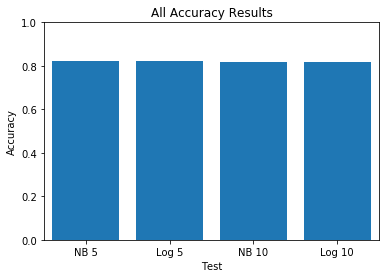

In [151]:
# Use matplotlib.pyplot to print the results of all four tests
# It can be observed that the results are all very close to each other
x = [1, 2, 3, 4]
data = [score5_nb, score5_log, score10_nb, score10_log]

plt.bar(x, data, align='center')
plt.title("All Accuracy Results")
plt.xlabel("Test")
plt.ylabel("Accuracy")
plt.axis((0.5, 4.5, 0, 1))
plt.xticks(range(1, 5), ('NB 5', 'Log 5', 'NB 10', 'Log 10'))

plt.show()